In [81]:
import numpy as np
import matplotlib.pyplot as plt

class image_unit:
    def __init__(self) -> None:
        self.num_of_points = 0
        self.cord_of_points = np.array([])
        self.raw_image = np.array([])
    def print_data(self) -> None:
        print(self.num_of_points)
        print(self.cord_of_points)
        print(self.raw_image)
        # Plotting the array as a grayscale image
        plt.imshow(self.raw_image, cmap='viridis')
        plt.colorbar()  # Adding a colorbar to show intensity scale
        plt.title('Visualization')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()

In [82]:
# For every image:
# Line 1: number of points(10)
# Line 2-11: exact positions of the points
# Others: grayscale image
def read_in_data(file_path:str) -> list:
    with open(file_path, 'r') as file:
        _images_ = []
        cop = [] # Store cordinates of points tempoarily
        ri = [] # Store raw image tempoarily
        for line in file:
            numbers = []
            numbers = [float(s) for s in line.strip().split()]
            if len(numbers) == 1:
                if len(_images_) > 0:
                    _images_[-1].raw_image = np.array(ri).T
                    ri.clear()
                _images_.append(image_unit())
                _images_[-1].num_of_points = int(numbers[0])
            elif len(numbers) == 2:
                cop.append(numbers)
                if len(cop) == _images_[-1].num_of_points:
                    _images_[-1].cord_of_points = np.array(cop)
                    _images_[-1].cord_of_points = _images_[-1].cord_of_points - 0.5 # -0.5, now the center is at (0, 0)
                    cop.clear()
            else:
                ri.append(numbers)
        _images_[-1].raw_image = np.array(ri).T
        return _images_

In [83]:
import cv2

# Define the color (B, G, R) and thickness of the cross marks
# color = (0, 255, 0)  # Green color
# cross_length = 10  # Length of the cross arms
# thickness = 2  # Thickness of the lines
def mark_point(image: np.array, points: list, color = (0, 255, 0), type = 'normal', cross_length = 2, thickness = 1) -> np.array:
    # Ensure the image is a NumPy array with the correct dtype
    if image.dtype != np.uint8:
        marked_image = (image / np.max(image) * 255).astype(np.uint8)
    else:
        marked_image = np.copy(image)
    if len(marked_image.shape) == 2 or (len(marked_image.shape) == 3 and marked_image.shape[2] == 1):
        marked_image = cv2.applyColorMap(marked_image, cv2.COLORMAP_TWILIGHT_SHIFTED)
    if type == 'normal':
        for (x, y) in points:
            cv2.line(marked_image, (x - cross_length, y), (x + cross_length, y), color, thickness)
            cv2.line(marked_image, (x, y - cross_length), (x, y + cross_length), color, thickness)
    elif type == 'skew':
        for (x, y) in points:
            cv2.line(marked_image, (x - cross_length, y - cross_length), (x + cross_length, y + cross_length), color, thickness)
            cv2.line(marked_image, (x + cross_length, y - cross_length), (x - cross_length, y + cross_length), color, thickness)
    # Display the image with marked points
    return marked_image

In [84]:
"""
    Extract a 5x5 subarray centered around the specified data point (center_x, center_y).
    
    Parameters:
    array (numpy.ndarray): The input array from which to extract the subarray.
    center_x (int): The x-coordinate (row) of the center data point.
    center_y (int): The y-coordinate (column) of the center data point.
    
    Returns:
    numpy.ndarray: The extracted 5x5 subarray, or None if the center point is too close to the border.
    """
def extract_subarr(array, center, half_size = 2): # A 5x5 array by default, half_size is 2
    (center_x, center_y) = center
    # Ensure the center is not too close to the borders
    left = max(center_x - half_size, 0)
    right = min(center_x + half_size + 1, array.shape[0])
    down = max(center_y - half_size, 0)
    up = min(center_y + half_size + 1, array.shape[1])
    # Extract the 5x5 subarray centered around (center_x, center_y)
    subarray = array[down : up,
                     left : right]
    return subarray

In [85]:
import math
def distance(p, q):
    # Function to calculate Euclidean distance between points p and q
    return math.sqrt((q[0] - p[0])**2 + (q[1] - p[1])**2)

def smallest_distance_to_set(point, point_set):
    # point is a tuple (x, y) representing the point P
    # point_set is a list of tuples [(x1, y1), (x2, y2), ...] representing the set S
    
    if not point_set:
        return float('inf')  # If point_set is empty, return infinity
    
    x_distance = float('inf')
    y_distance = float('inf')
    min_distance = float('inf')
    
    for q in point_set:
        dist = distance(point, q)
        if dist < min_distance:
            min_distance = dist
            x_distance = point[0] - q[0]
            y_distance = point[1] - q[1]
    
    return [x_distance, y_distance, min_distance]

class judge_data:
    def __init__(self) -> None:
        self.dist = []
        self.rev_dist = []
        self.large_error = []
        self.large_error_points = []
        self.not_found = []
        self.not_found_points = []
        self.dist_array = np.array([])
    
    def print_data(self) -> None:
        # Testing code
        print(self.dist)  
        print(self.rev_dist)
        print(self.large_error)
        print(self.large_error_points)
        print(self.not_found)
        print(self.not_found_points)
        print(self.dist_array)
    
    def plot_histogram(self) -> None:
        # Plotting the histogram
        plt.hist(self.dist_array[0], bins=50, edgecolor='black')  # Adjust bins as needed
        plt.title('Histogram of Delta x')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

        plt.hist(self.dist_array[1], bins=50, edgecolor='black')  # Adjust bins as needed
        plt.title('Histogram of Delta y')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

        plt.hist(self.dist_array[2], bins=50, edgecolor='black')  # Adjust bins as needed
        plt.title('Histogram of Delta r')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    
    def show_error(_images_: list, _finded_: list, self) -> None:
        for i in range (len(self.large_error)):
            print('Image ' + str(self.large_error[i]) + ' Raw Data')
            print(extract_subarr(_images_[self.large_error[i]].raw_image, self.large_error_points[i]))
            marked_imag = mark_point(_images_[self.large_error[i]].raw_image, _finded_[self.large_error[i]])
            marked_imag = mark_point(marked_imag, [tuple(row) for row in np.round(_images_[self.large_error[i]].cord_of_points).astype(int)], (255, 0, 0))
            plt.imshow(marked_imag)
            plt.title('Image ' + str(self.large_error[i]) + ' Visualization')
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.show()
        
        for i in range (len(self.not_found)):
            print('Image ' + str(self.not_found[i]) + ' Raw Data')
            print('Not Found:', self.not_found_points[i])
            print(extract_subarr(_images_[self.not_found[i]].raw_image, self.not_found_points[i]))
            marked_imag = mark_point(_images_[self.not_found[i]].raw_image, [tuple(row) for row in np.round(_images_[self.not_found[i]].cord_of_points).astype(int)], (255, 0, 0))
            marked_imag = mark_point(marked_imag, _finded_[self.not_found[i]])

            plt.imshow(marked_imag)
            plt.title('Image ' + str(self.not_found[i]) + ' Visualization')
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.show()


def judge(_images_: list, _finded_: list) -> judge_data:
    _data_ = judge_data()

    for i in range (len(_images_)):
        for j in range(len(_finded_[i])):
            _data_.dist.append(smallest_distance_to_set(_finded_[i][j], [tuple(row) for row in _images_[i].cord_of_points]))
            if _data_.dist[-1][2] > 1.5:
                _data_.large_error.append(i)
                _data_.large_error_points.append(_finded_[i][j])
        for j in range(len(_images_[i].cord_of_points)):
            _data_.rev_dist.append(smallest_distance_to_set(_images_[i].cord_of_points[j], _finded_[i]))
            if _data_.rev_dist[-1][2] > 1.5:
                _data_.not_found.append(i)
                _data_.not_found_points.append(tuple(np.round(_images_[i].cord_of_points[j]).astype(int)))

    _data_.dist_array = np.array(_data_.dist).T 

    return _data_
    

In [86]:
def find_local_maxima(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    
    def is_local_maxima(i, j):
        current = matrix[i][j]
        # Check all eight possible neighbors
        neighbors = [
            (i-1, j-1), (i-1, j), (i-1, j+1),
            (i, j-1),            (i, j+1),
            (i+1, j-1), (i+1, j), (i+1, j+1)
        ]
        for x, y in neighbors:
            if 0 <= x < rows and 0 <= y < cols:
                if matrix[x][y] >= current:
                    return False
        return True

    local_maxima = []
    for i in range(rows):
        for j in range(cols):
            if is_local_maxima(i, j):
                local_maxima.append((j, i))
    
    return local_maxima

def remove_isolated_pixels(image):
    # Make a copy of the image to modify
    processed_image = image.copy()
    
    # Get the dimensions of the image
    rows, cols = image.shape
    
    for i in range(rows):
        for j in range(cols):
            if image[i, j] != 0:
                # Check edges and corners
                if i == 0 or i == rows - 1 or j == 0 or j == cols - 1:
                    neighbors = [
                        image[i-1, j] if i > 0 else 0,
                        image[i+1, j] if i < rows - 1 else 0,
                        image[i, j-1] if j > 0 else 0,
                        image[i, j+1] if j < cols - 1 else 0
                    ]
                    if sum(neighbors) == 0:
                        processed_image[i, j] = 0
                else:
                    if image[i-1, j] == 0 and image[i+1, j] == 0 and \
                       image[i, j-1] == 0 and image[i, j+1] == 0 and \
                       image[i-1, j-1] == 0 and image[i-1, j+1] == 0 and \
                       image[i+1, j-1] == 0 and image[i+1, j+1] == 0:
                        processed_image[i, j] = 0
    
    return processed_image

In [87]:
def find_points(_images_: list, algorithm: str) -> list: 
    '''
    algorithms: 'local maxima', 'local maxima denoised'
    '''
    _finded_ = []
    if algorithm == 'local maxima':
        for i in range (len(_images_)):
            _finded_.append(find_local_maxima(_images_[i].raw_image))
    if algorithm == 'local maxima denoised':
        for i in range (len(_images_)):
            _denoised_ = remove_isolated_pixels(_images_[i].raw_image)
            _finded_.append(find_local_maxima(_denoised_))
    return _finded_

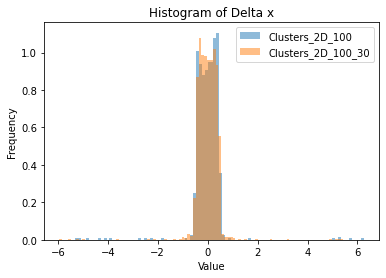

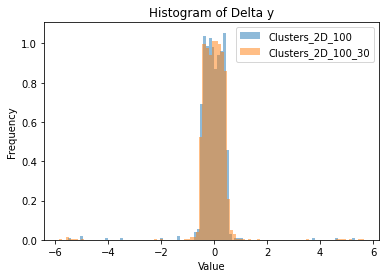

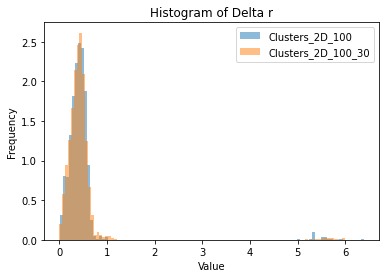

In [88]:
images = read_in_data('./Clusters_2D_100.txt')
finded = find_points(images, 'local maxima')
result1 = judge(images, finded)
images_30 = read_in_data('./Clusters_2D_100_30.txt')
finded_30 = find_points(images_30, 'local maxima')
result2 = judge(images_30, finded_30)

# result1.print_data()
# result1.plot_histogram()
                                    
# Plot the histograms with specified border colors and transparent fills
plt.hist(result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

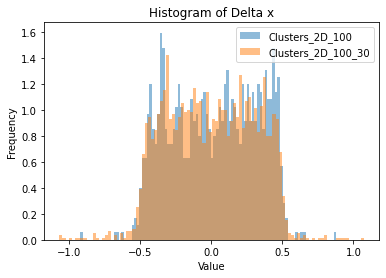

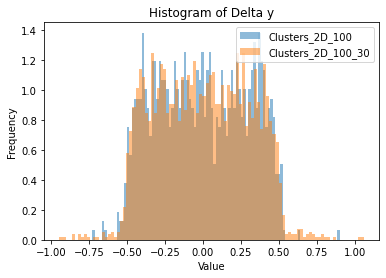

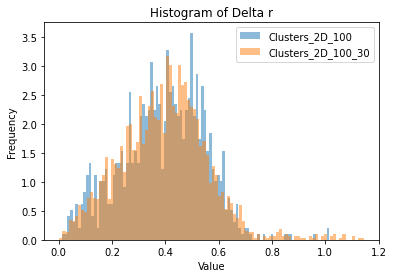

In [89]:
images = read_in_data('./Clusters_2D_100.txt')
finded = find_points(images, 'local maxima denoised')
result1 = judge(images, finded)
images_30 = read_in_data('./Clusters_2D_100_30.txt')
finded_30 = find_points(images_30, 'local maxima denoised')
result2 = judge(images_30, finded_30)

# Plot the histograms with specified border colors and transparent fills
plt.hist(result1.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[0], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[1], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()

# Plot the histograms
plt.hist(result1.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100')  # Histogram for data1
plt.hist(result2.dist_array[2], bins=100, density=True, alpha=0.5, label='Clusters_2D_100_30')    # Histogram for data2
# Customize the plot
plt.title('Histogram of Delta r')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')  # Add a legend to differentiate the datasets
plt.show()